### Load libraries

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb
import wandb.sdk

In [2]:
sys.path.append("../..")
from src.utils import runs_to_df

### Load data

In [3]:
api = wandb.Api()
runs: list[wandb.sdk.wandb_run.Run] = api.runs(
    f"data-frugal-learning/adv-train",
    filters={"tags": {"$in": ["student-teacher-random-init-v3"]}},
)

df_all = runs_to_df(runs)
df = df_all[
    (df_all.state == "finished")
]
len(df)

20

### Plots

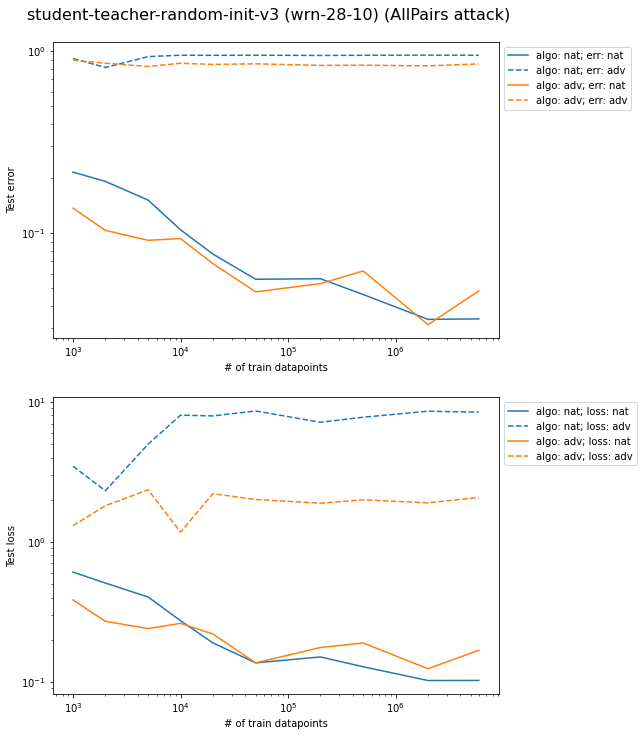

In [4]:
plt.figure(figsize=(8, 12))
plt.suptitle("student-teacher-random-init-v3 (wrn-28-10) (AllPairs attack)", fontsize=16, y=0.92)

for adv_train, color in zip([False, True], ["tab:blue", "tab:orange"]):
    cdf = df[(df.do_adv_training == adv_train)].sort_values(
        "n_train"
    )

    lab = "adv" if adv_train else "nat"

    plt.subplot(2, 1, 1)
    plt.plot(
        cdf.n_train,
        1 - cdf.test_acc_nat,
        label=f"algo: {lab}; err: nat",
        color=color,
    )
    plt.plot(
        cdf.n_train,
        1 - cdf.test_acc_adv,
        label=f"algo: {lab}; err: adv",
        linestyle="--",
        color=color,
    )

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("# of train datapoints")
    plt.ylabel("Test error")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    plt.subplot(2, 1, 2)
    plt.plot(
        cdf.n_train,
        cdf.test_loss_nat,
        label=f"algo: {lab}; loss: nat",
        color=color,
    )
    plt.plot(
        cdf.n_train,
        cdf.test_loss_adv,
        label=f"algo: {lab}; loss: adv",
        linestyle="--",
        color=color,
    )

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("# of train datapoints")
    plt.ylabel("Test loss")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
